In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV, train_test_split
data = []
with open('C:/Users/TO THANH/OneDrive/Máy tính/hôm nay/university.data', 'r') as file:
    university = {}
    for line in file:
        if '(def-instance' in line:
            university = {'name': line.split()[1]}
        elif '))' in line:
            data.append(university)
            university = {}
        else:
            matches = re.findall('\((.*?)\)', line)
            if matches:
                split_data = matches[0].split(None, 1)
                if len(split_data) == 2:
                    attribute, value = split_data
                    university[attribute] = value
df = pd.DataFrame(data)
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column].astype(str))

# Giả sử 'label' là cột chứa nhãn mục tiêu
X = df.drop('ACADEMICS', axis=1)
y = df['ACADEMICS']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo mô hình Random Forest
rf = RandomForestClassifier(random_state=42)

# Định nghĩa các tham số cho mô hình Random Forest
rf_parameters = {'n_estimators': [100, 200, 300, 400, 500], 'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 30, 40, 50]}

# Tạo mô hình KNN
knn = KNeighborsClassifier()

# Định nghĩa các tham số cho mô hình KNN
knn_parameters = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}

# Tìm kiếm lưới để tìm tham số tốt nhất
rf_clf = GridSearchCV(rf, rf_parameters)
knn_clf = GridSearchCV(knn, knn_parameters)

# Huấn luyện mô hình
rf_clf.fit(X_train, y_train)
knn_clf.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
rf_y_pred = rf_clf.predict(X_test)
knn_y_pred = knn_clf.predict(X_test)

# Đánh giá chất lượng của mô hình
print("RF Accuracy:", accuracy_score(y_test, rf_y_pred))
print("RF Recall:", recall_score(y_test, rf_y_pred, average='macro'))
print("RF Precision:", precision_score(y_test, rf_y_pred, average='macro'))
print("RF F1 Score:", f1_score(y_test, rf_y_pred, average='macro'))

print("KNN Accuracy:", accuracy_score(y_test, knn_y_pred))
print("KNN Recall:", recall_score(y_test, knn_y_pred, average='macro'))
print("KNN Precision:", precision_score(y_test, knn_y_pred, average='macro'))
print("KNN F1 Score:", f1_score(y_test, knn_y_pred, average='macro'))

# In báo cáo phân loại
print("RF Classification Report:\n", classification_report(y_test, rf_y_pred))
print("KNN Classification Report:\n", classification_report(y_test, knn_y_pred))

# In tham số tốt nhất
print("RF Best Parameters: ", rf_clf.best_params_)
print("KNN Best Parameters: ", knn_clf.best_params_)

C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


RF Accuracy: 1.0
RF Recall: 1.0
RF Precision: 1.0
RF F1 Score: 1.0
KNN Accuracy: 0.9230769230769231
KNN Recall: 0.5
KNN Precision: 0.46153846153846156
KNN F1 Score: 0.48000000000000004
RF Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00        12

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.92      1.00      0.96        12

    accuracy                           0.92        13
   macro avg       0.46      0.50      0.48        13
weighted avg       0.85      0.92      0.89        13

RF Best Parameters:  {'criterion': 'gini', 'max_depth': None, 'n_estimators': 100}
KNN Best Parameters:  {

C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: Un

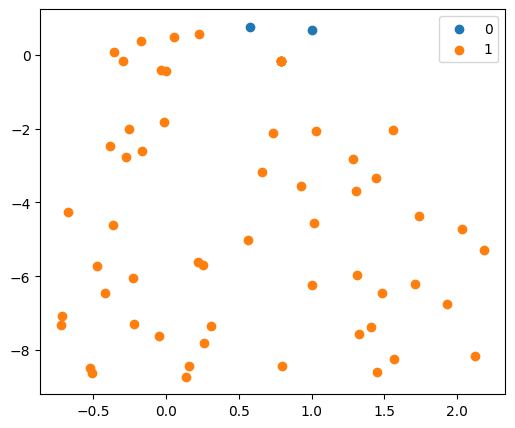

C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


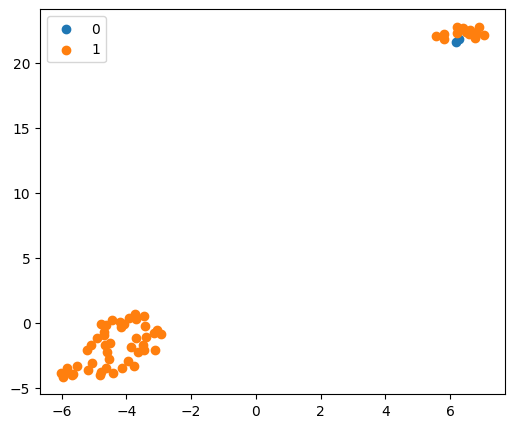

In [15]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap

# Предположим, что 'label' - это столбец с целевыми метками
X = df.drop('ACADEMICS', axis=1)
y = df['ACADEMICS']


# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(6, 5))
for i, label in enumerate(list(set(y))):
    plt.scatter(X_tsne[y == label, 0], X_tsne[y == label, 1], label=label)
plt.legend()
plt.show()

# UMAP
reducer = umap.UMAP(random_state=42)
X_umap = reducer.fit_transform(X)

plt.figure(figsize=(6, 5))
for i, label in enumerate(list(set(y))):
    plt.scatter(X_umap[y == label, 0], X_umap[y == label, 1], label=label)
plt.legend()
plt.show()

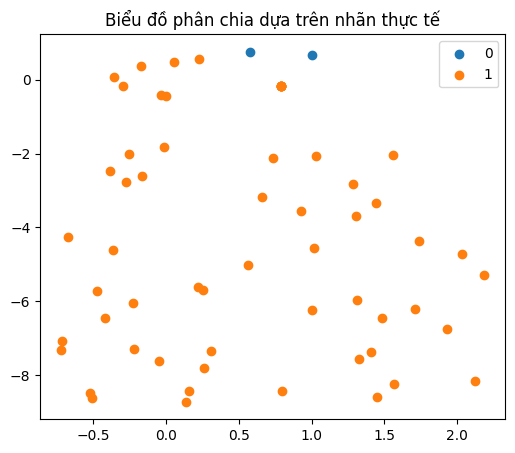

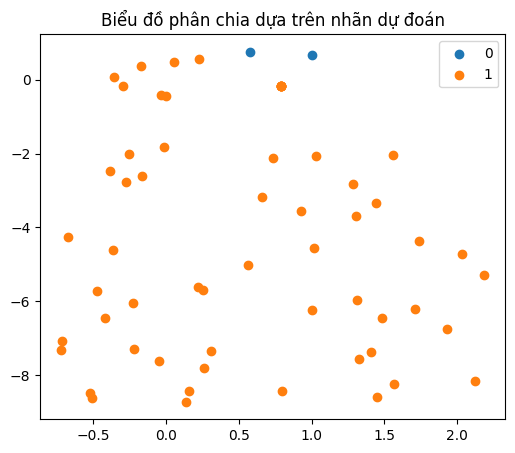

In [16]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap

# Giả sử 'ACADEMICS' là cột chứa nhãn mục tiêu
X = df.drop('ACADEMICS', axis=1)
y = df['ACADEMICS']

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Vẽ biểu đồ phân chia thành các lớp dựa trên các mẫu có nhãn lớp đã biết
plt.figure(figsize=(6, 5))
for i, label in enumerate(list(set(y))):
    plt.scatter(X_tsne[y == label, 0], X_tsne[y == label, 1], label=label)
plt.legend()
plt.title("Biểu đồ phân chia dựa trên nhãn thực tế")
plt.show()

# Dự đoán nhãn cho tập dữ liệu
y_pred = rf_clf.predict(X)

# Vẽ biểu đồ phân chia thành các lớp dựa trên nhãn do bộ phân loại đặt
plt.figure(figsize=(6, 5))
for i, label in enumerate(list(set(y_pred))):
    plt.scatter(X_tsne[y_pred == label, 0], X_tsne[y_pred == label, 1], label=label)
plt.legend()
plt.title("Biểu đồ phân chia dựa trên nhãn dự đoán")
plt.show()